In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
# 使用Savitzky-Golay滤波器替代滑动平均
from scipy.signal import savgol_filter

In [203]:
# 读取CSV文件（无表头）
df = pd.read_csv('/home/yokay/gitpool/10-1d.csv', header=None)

# 提取数据列（假设格式为：时间1, 通道1, 时间2, 通道2）
time1 = df[0].astype(float)  # 第一列时间（秒）
time2 = df[2].astype(float)  # 第三列时间（秒）
channel1 = df[1].astype(float)  # 第二列通道1波形
channel2 = df[3].astype(float)  # 第四列通道2波形

In [204]:
# # 读取CSV文件（无表头）
# df = pd.read_csv('/home/yokay/gitpool/2-1Tx.csv', header=None)

# # 提取数据列（假设格式为：时间1, 通道1, 时间2, 通道2）
# time1 = df[9].astype(float)  # 第一列时间（秒）
# channel1 = df[10].astype(float)  # 第二列通道1波形
# time2 = df[21].astype(float)  # 第二列时间（秒）
# channel2 = df[22].astype(float)  # 第四列通道2波形

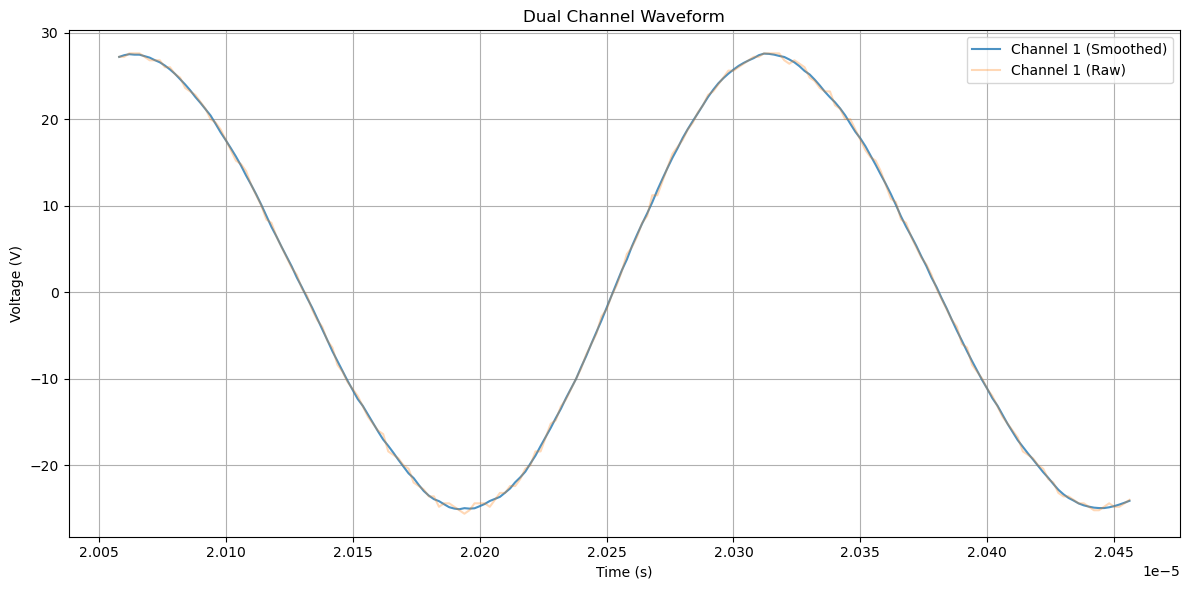

In [205]:
# 创建画布和坐标轴
plt.figure(figsize=(12, 6))


window_size = 11  # 必须为奇数
smooth_ch1 = savgol_filter(channel1, window_size, 3)  # 三次多项式
smooth_ch2 = savgol_filter(channel2, window_size, 3)

# 由于Savitzky-Golay保持数组长度不变，直接使用原时间序列
smooth_time1 = time1[:]
smooth_time2 = time2[:]

# 绘制时应保持维度一致（保持不变）
plt.plot(smooth_time1[-200:], smooth_ch1[-200:], label='Channel 1 (Smoothed)', alpha=0.8)
#plt.plot(smooth_time[-1000:], smooth_ch2[-1000:], label='Channel 2 (Smoothed)', alpha=0.8)
plt.plot(smooth_time1[-200:], channel1[-200:], label='Channel 1 (Raw)', alpha=0.3)

# 添加图形元素
plt.title('Dual Channel Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')  # 修改单位
plt.grid(True)
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

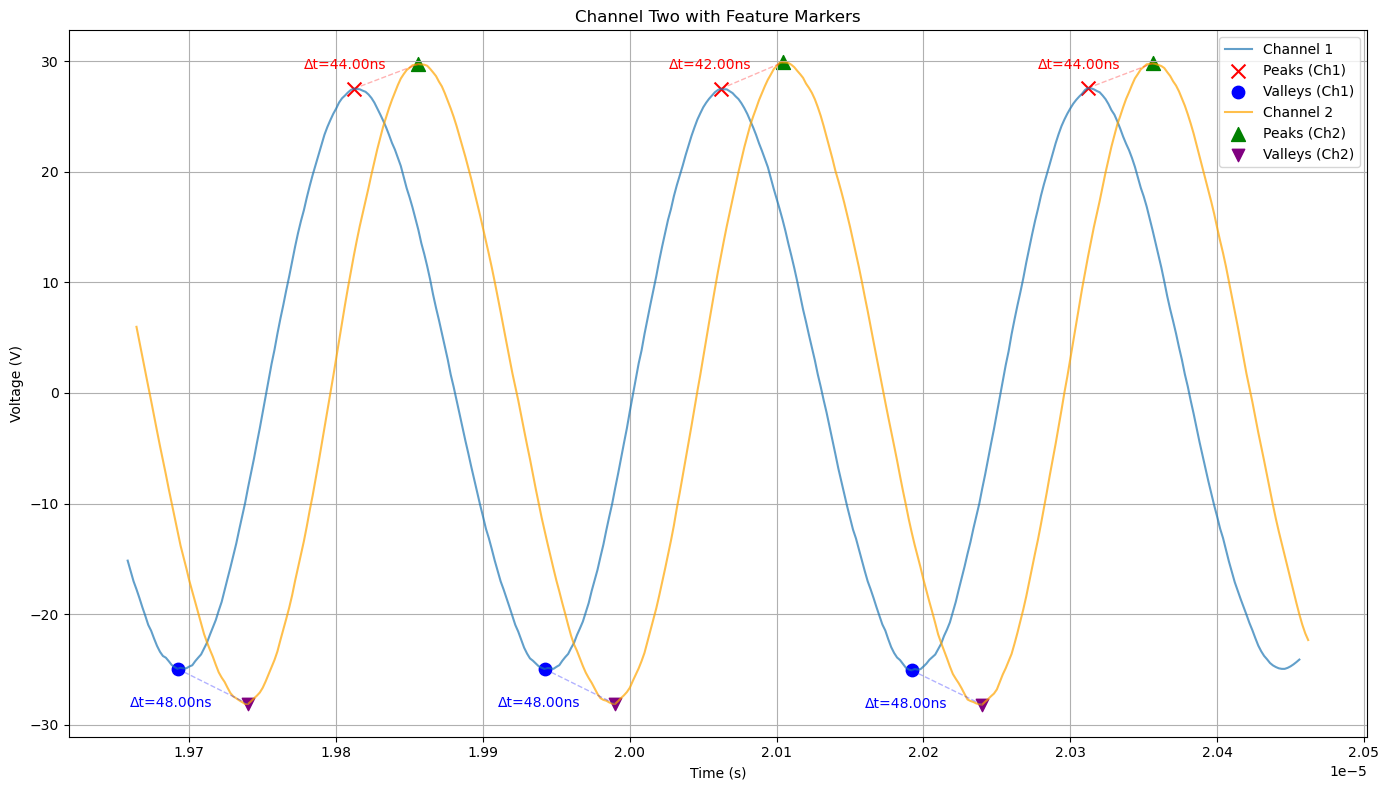

Channel 1 peaks at times: [-0.0000204380, -0.0000201860, -0.0000199340, -0.0000196860, -0.0000194360, -0.0000191860, -0.0000189360, -0.0000186860, -0.0000184360, -0.0000181860, -0.0000179360, -0.0000176860, -0.0000174360, -0.0000171860, -0.0000169360, -0.0000166860, -0.0000164360, -0.0000161860, -0.0000159360, -0.0000156860, -0.0000154360, -0.0000151860, -0.0000149360, -0.0000146860, -0.0000144360, -0.0000141860, -0.0000139360, -0.0000136860, -0.0000134360, -0.0000131860, -0.0000129360, -0.0000126860, -0.0000124360, -0.0000121860, -0.0000119360, -0.0000116860, -0.0000114360, -0.0000111860, -0.0000109360, -0.0000106860, -0.0000104360, -0.0000101860, -0.0000099360, -0.0000096860, -0.0000094360, -0.0000091860, -0.0000089360, -0.0000086860, -0.0000084360, -0.0000081860, -0.0000079360, -0.0000076860, -0.0000074360, -0.0000071860, -0.0000069360, -0.0000066860, -0.0000064360, -0.0000061860, -0.0000059360, -0.0000056860, -0.0000054360, -0.0000051860, -0.0000049360, -0.0000046860, -0.0000044360

In [206]:
sel_datalen = 400
# 特征检测 (增加 prominence 和 distance 参数过滤噪声)
peaks1, _ = find_peaks(smooth_ch1, height=0, prominence=1.0, distance=20,width=5)
valleys1, _ = find_peaks(-smooth_ch1, height=0, prominence=1.0, distance=20,width=5)

peaks2, _ = find_peaks(smooth_ch2, height=0, prominence=1.0, distance=20,width=5)
valleys2, _ = find_peaks(-smooth_ch2, height=0, prominence=1.0, distance=20,width=5)

# 创建双通道可视化图形
plt.figure(figsize=(14, 8))

# 通道1波形及标记
view_range = slice(-sel_datalen,None)  # 截取最后sel_datalen个数据点
plt.plot(smooth_time1[view_range], smooth_ch1[view_range], label='Channel 1', alpha=0.7)
plt.scatter(smooth_time1.iloc[peaks1][peaks1 >= len(smooth_ch1)-sel_datalen],  # 筛选可见范围内的波峰
            smooth_ch1[view_range][peaks1[peaks1 >= len(smooth_ch1)-sel_datalen]-len(smooth_ch1)+sel_datalen], 
            c='red', marker='x', s=100, label='Peaks (Ch1)')
plt.scatter(smooth_time1.iloc[valleys1][valleys1 >= len(smooth_ch1)-sel_datalen],
            smooth_ch1[view_range][valleys1[valleys1 >= len(smooth_ch1)-sel_datalen]-len(smooth_ch1)+sel_datalen],
            c='blue', marker='o', s=80, label='Valleys (Ch1)')
    
# 通道2波形及标记
plt.plot(smooth_time2[view_range], smooth_ch2[view_range], label='Channel 2', alpha=0.7, color='orange')
plt.scatter(smooth_time2.iloc[peaks2][peaks2 >= len(smooth_ch2)-sel_datalen],
            smooth_ch2[view_range][peaks2[peaks2 >= len(smooth_ch2)-sel_datalen]-len(smooth_ch2)+sel_datalen], 
            c='green', marker='^', s=100, label='Peaks (Ch2)')
plt.scatter(smooth_time2.iloc[valleys2][valleys2 >= len(smooth_ch2)-sel_datalen],
            smooth_ch2[view_range][valleys2[valleys2 >= len(smooth_ch2)-sel_datalen]-len(smooth_ch2)+sel_datalen],
            c='purple', marker='v', s=80, label='Valleys (Ch2)')
plt.title('Channel Two with Feature Markers')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

# 获取可见范围内的波峰波谷
valid_peaks1 = peaks1[peaks1 >= len(smooth_ch1)-sel_datalen]
valid_valleys1 = valleys1[valleys1 >= len(smooth_ch1)-sel_datalen]
valid_peaks2 = peaks2[peaks2 >= len(smooth_ch2)-sel_datalen]
valid_valleys2 = valleys2[valleys2 >= len(smooth_ch2)-sel_datalen]

# 绘制波峰差值连线和标注
for i in range(min(len(valid_peaks1), len(valid_peaks2))):
    idx1, idx2 = valid_peaks1[i], valid_peaks2[i]
    t1, t2 = smooth_time1.iloc[idx1], smooth_time2.iloc[idx2]
    v1, v2 = smooth_ch1[idx1], smooth_ch2[idx2]
    
    plt.plot([t1, t2], [v1, v2], 'r--', alpha=0.3, lw=1)
    # 在波峰差值标注部分修改
    plt.annotate(f'Δt={(t2-t1)*1e9:.2f}ns',  # 修改单位并放大时间差
                ((t1+t2)/2, (v1+v2)/2),
                textcoords="offset points",
                xytext=(0,5),
                ha='right',
                fontsize=10,
                color='red')

# 波谷差值连线和标注（使用蓝色）
for i in range(min(len(valid_valleys1), len(valid_valleys2))):
    idx1, idx2 = valid_valleys1[i], valid_valleys2[i]
    t1, t2 = smooth_time1.iloc[idx1], smooth_time2.iloc[idx2]
    v1, v2 = smooth_ch1[idx1], smooth_ch2[idx2]
    
    plt.plot([t1, t2], [v1, v2], 'b--', alpha=0.3, lw=1)
    # 在波谷差值标注部分做相同修改
    plt.annotate(f'Δt={(t2-t1)*1e9:.2f}ns',  # 单位转换为纳秒
                ((t1+t2)/2, (v1+v2)/2),
                textcoords="offset points",
                xytext=(0,-15),
                ha='right',
                fontsize=10,
                color='blue')
    
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

# 保留原有的打印输出（保持不变）
print("Channel 1 peaks at times: [{}]".format(", ".join("{0:.10f}".format(x) for x in smooth_time1.values[peaks1])))
print("Channel 2 peaks at times: [{}]".format(", ".join("{0:.10f}".format(x) for x in smooth_time2.values[peaks2])))

In [207]:
# 取最小长度进行对齐
min_peak_len = min(len(peaks1), len(peaks2))
delta_peak = smooth_time1.values[peaks1[:min_peak_len]] - smooth_time2.values[peaks2[:min_peak_len]]

min_valley_len = min(len(valleys1), len(valleys2))
delta_valley = smooth_time1.values[valleys1[:min_valley_len]] - smooth_time2.values[valleys2[:min_valley_len]]

print(min_peak_len,min_valley_len)

164 163


In [208]:
# 修改过滤逻辑
def filter_above_mean(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    upper_limit = mean_val + 1 * std_val  # 添加2倍标准差上限
    lower_limit = mean_val - 1 * std_val  # 添加2倍标准差下限
    return data[(data > lower_limit) & (data <= upper_limit)], mean_val, upper_limit, lower_limit


Peak Mean: 42.56 ns Upper Limit: 44.65 ns Lower Limit: 40.47 ns
Valley Mean: 43.03 ns Upper Limit: 45.03 ns Lower Limit: 41.03 ns
New Peak Mean: 42.97 ns
New Valley Mean: 42.75 ns


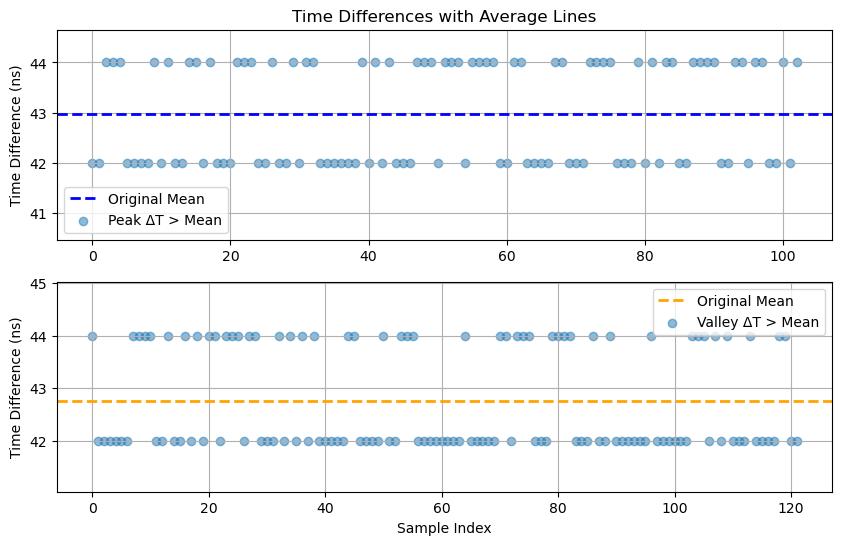

In [209]:
# 转换为纳秒
delta_peak_ns = abs(delta_peak) * 1e9
delta_valley_ns = abs(delta_valley) * 1e9

# 创建散点图
plt.figure(figsize=(10, 6))

# 应用新过滤方法
filtered_peak, peak_mean, upper_peak_lim, lower_peak_lim = filter_above_mean(delta_peak_ns)
filtered_valley, valley_mean, upper_valley_lim ,lower_valley_lim= filter_above_mean(delta_valley_ns)
print(f"Peak Mean: {peak_mean:.2f} ns", f"Upper Limit: {upper_peak_lim:.2f} ns",f"Lower Limit: {lower_peak_lim:.2f} ns")
print(f"Valley Mean: {valley_mean:.2f} ns", f"Upper Limit: {upper_valley_lim:.2f} ns",f"Lower Limit: {lower_valley_lim:.2f} ns")

new_peak_mean = np.mean(filtered_peak)
new_valley_mean = np.mean(filtered_valley)
print(f"New Peak Mean: {new_peak_mean:.2f} ns")
print(f"New Valley Mean: {new_valley_mean:.2f} ns")
# 修改绘图部分
plt.subplot(2, 1, 1)
plt.axhline(y=new_peak_mean, color='blue', linestyle='--', linewidth=2, label='Original Mean')
plt.scatter(range(len(filtered_peak)), filtered_peak, alpha=0.5, label='Peak ΔT > Mean')
plt.ylim(lower_peak_lim, upper_peak_lim)
plt.ylabel('Time Difference (ns)')
plt.title('Time Differences with Average Lines')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.axhline(y=new_valley_mean, color='orange', linestyle='--', linewidth=2, label='Original Mean')
plt.scatter(range(len(filtered_valley)), filtered_valley, alpha=0.5, label='Valley ΔT > Mean')
plt.ylim(lower_valley_lim, upper_valley_lim)
plt.xlabel('Sample Index')
plt.ylabel('Time Difference (ns)')
plt.legend()
plt.grid(True)

plt.show()

In [210]:
# 更新统计显示（改为峰谷差平均值）
stats = []
table_data = []
def calc_nearest_diff(arr1, arr2):
    """计算arr1中每个元素与arr2中最近元素的差值"""
    diffs = []
    for t in arr1:
        if len(arr2) == 0:
            diffs.append(np.nan)
            continue
        nearest_idx = np.argmin(np.abs(arr2 - t))
        diffs.append(t - arr2[nearest_idx])
    return np.array(diffs)

# 在统计计算部分修改为：
# 计算跨通道最邻近差值
cross_peak_diffs = calc_nearest_diff(smooth_time1.values[peaks1], smooth_time2.values[peaks2])
valid_peak_diffs = cross_peak_diffs[~np.isnan(cross_peak_diffs)]*1e9

cross_valley_diffs = calc_nearest_diff(smooth_time1.values[valleys1], smooth_time2.values[valleys2]) 
valid_valley_diffs = cross_valley_diffs[~np.isnan(cross_valley_diffs)]*1e9

# 修正平均值计算并添加异常值过滤
def filter_outliers(data):
    if len(data) == 0:
        return data, np.nan, np.nan
    mean_val = np.mean(data)
    std_val = np.std(data)
    # 保留 [mean - std, mean + std] 范围内的数据
    lower_bound = mean_val - std_val
    upper_bound = mean_val + std_val
    filtered = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered, mean_val, (lower_bound, upper_bound)

# 应用过滤
filtered_peaks, peak_avg, (peak_low, peak_high) = filter_outliers(valid_peak_diffs)
filtered_valleys, valley_avg, (valley_low, valley_high) = filter_outliers(valid_valley_diffs)

# 新增打印过滤后的均值
print(f"New Filtered Peak Mean: {np.mean(filtered_peaks):.2f} ns" if len(filtered_peaks) > 0 else "No valid peaks")
print(f"New Filtered Valley Mean: {np.mean(filtered_valleys):.2f} ns" if len(filtered_valleys) > 0 else "No valid valleys")

filter_sum_mean = (np.mean(filtered_peaks)+np.mean(filtered_valleys))/2
print(f"New Filtered Sum Mean: {filter_sum_mean:.2f} ns")

# 更新到DataFrame
diff_data = []
for diff in filtered_peaks:
    diff_data.append({'Type': 'Peak', 'Status': 'Normal', 'Value (ns)': diff})
for diff in filtered_valleys:
    diff_data.append({'Type': 'Peak', 'Status': 'Outlier', 'Value (ns)': diff})
# 重复相同处理逻辑给valley...

# 生成DataFrame
df = pd.DataFrame(diff_data)

# 保留原有统计信息（可选）
stats_df = pd.DataFrame(
    table_data,
    columns=['Channel', 'Peak Count', 'Avg Peak Interval', 'Avg Valley Interval']
)



New Filtered Peak Mean: -42.97 ns
New Filtered Valley Mean: -42.75 ns
New Filtered Sum Mean: -42.86 ns


In [211]:
df

,Type,Status,Value (ns)
0,Peak,Normal,-42.0
1,Peak,Normal,-42.0
2,Peak,Normal,-44.0
3,Peak,Normal,-44.0
4,Peak,Normal,-44.0
...,...,...,...
220,Peak,Outlier,-42.0
221,Peak,Outlier,-44.0
222,Peak,Outlier,-44.0
223,Peak,Outlier,-42.0
